<a href="https://colab.research.google.com/github/lakshitgosain/Transformers-for-NLP/blob/main/Transformers_B06_Language_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Translation
- How to evaluate
*Many valid translations can exist for a given input
*BLUE Score is the most popular metric
* The Best corellated with Human Judgement

3 Facts:
* compares predictions with multiple refrence texts
* is a value between 0-1
* looks at the precision of n-grams(n=1,2,3,4...)

In [1]:
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip



--2023-07-06 10:27:09--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  --.-KB/s    in 0.008s  

2023-07-06 10:27:09 (329 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [2]:
!unzip -nq spa-eng.zip

In [3]:
!ls

sample_data  spa-eng  spa-eng.zip


In [4]:
ls spa-eng

_about.txt  spa.txt


In [5]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [6]:
#Compile eng-spa translations
eng2spa={}
for line in open("spa-eng/spa.txt"):
  line=line.rstrip()
  eng, spa= line.split("\t")
  if eng not in eng2spa:
    eng2spa[eng]=[]
  eng2spa[eng].append(spa)

In [7]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [8]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [9]:
from nltk.tokenize import RegexpTokenizer

tokenizer=RegexpTokenizer(r'\w+')

In [10]:
tokens=tokenizer.tokenize("¿Dónde estoy?".lower())
sentence_bleu([tokens], tokens)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.491668146240062e-154

In [11]:
sentence_bleu([['hi']], ['hi'])

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.821831989445342e-231

In [12]:
smoother=SmoothingFunction()
sentence_bleu(['hi'], 'hi', smoothing_function=smoother.method4)

0.2213885886251307

In [13]:
sentence_bleu(['hi there'.split()], "hi there friend".split())

1.133422688662942e-154

In [14]:
eng2spa_tokens={}
for eng, spa_list in eng2spa.items():
  spa_list_tokens=[]
  for text in spa_list:
    tokens=tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng]=spa_list_tokens

In [15]:
eng2spa_tokens

{'Go.': [['ve'], ['vete'], ['vaya'], ['váyase']],
 'Hi.': [['hola']],
 'Run!': [['corre']],
 'Run.': [['corred']],
 'Who?': [['quién']],
 'Fire!': [['fuego'], ['incendio'], ['disparad']],
 'Help!': [['ayuda'], ['socorro', 'auxilio'], ['auxilio']],
 'Jump!': [['salta']],
 'Jump.': [['salte']],
 'Stop!': [['parad'], ['para'], ['pare']],
 'Wait!': [['espera']],
 'Wait.': [['esperen']],
 'Go on.': [['continúa'], ['continúe']],
 'Hello!': [['hola']],
 'I ran.': [['corrí'], ['corría']],
 'I try.': [['lo', 'intento']],
 'I won!': [['he', 'ganado']],
 'Oh no!': [['oh', 'no']],
 'Relax.': [['tomátelo', 'con', 'soda']],
 'Smile.': [['sonríe']],
 'Attack!': [['al', 'ataque'], ['atacad']],
 'Get up.': [['levanta']],
 'Go now.': [['ve', 'ahora', 'mismo']],
 'Got it!': [['lo', 'tengo']],
 'Got it?': [['lo', 'pillas'], ['entendiste']],
 'He ran.': [['él', 'corrió']],
 'Hop in.': [['métete', 'adentro']],
 'Hug me.': [['abrázame']],
 'I fell.': [['me', 'caí']],
 'I know.': [['yo', 'lo', 'sé']],
 'I lef

In [16]:
!pip install transformers sentencepiece transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 123.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.8 MB/s eta 0:00:00


In [17]:
from transformers import pipeline
translator=pipeline("translation",
                    model="Helsinki-NLP/opus-mt-en-es",device=0)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [18]:
translator("I like eggs")

[{'translation_text': 'Me gustan los huevos.'}]

In [23]:
eng_phrase=list(eng2spa.keys())
len(eng_phrase)

102904

In [29]:
eng_phrases_subset=eng_phrase[20_000:21_000]

In [30]:
translations=translator(eng_phrases_subset)

In [31]:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [36]:
scores=[]
for eng, pred in zip(eng_phrases_subset, translations):
  matches=eng2spa_tokens[eng]

  spa_pred=tokenizer.tokenize(pred['translation_text'].lower())

  score=sentence_bleu(matches, spa_pred)
  scores.append(score)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

(array([649.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   1.,   2.,   2.,   3.,   0.,   0.,   0.,   0.,
         16.,   0.,   0.,   0.,   3.,   7.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 313.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

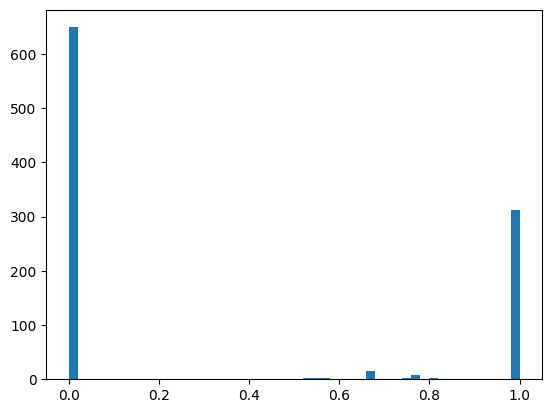

In [37]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50)

In [38]:
import numpy as np
np.mean(scores)

0.3383504014386889